<a href="https://colab.research.google.com/github/Donalizasaji/LAB/blob/main/LAB%20TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('/content/drive/MyDrive/2015.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [6]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [35]:
bin_edges=[0,2,5,8]
bin_labels=['Low Happiness','Medium Happiness','High Happiness']
df['Happiness']=pd.cut(df[df,('Happiness Score')])
edges=bin_edges, labels=bin_labels
df.bloxplot['Happiness']

InvalidIndexError: ignored

In [21]:
encoded_data=pd.get_dummies (df,columns=['Region'])

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data= scaler.fit_transform(df,['Economy (GDP per Capita)'])

ValueError: ignored

In [63]:
from scipy.stats import chi2_contingency
np.random.seed(42)
n_samples = 200
contingency_table = pd.crosstab(df['Region'], df['Happiness Rank'])
chi2, p, dof, expected_frequencies = chi2_contingency(contingency_table)
print('Chi Square value:',chi2_contigency)
print('P Value:',p_value)
print('Degree of freedom:',dof)
print('Expected Frequences\n:',expected_frequencies)
if(p<0.05):
  print('there is a significant association between the Region and Happiness Rank')
else:
  print('there is a no significant association between the Region and Happiness Rank')

NameError: ignored

In [55]:
from scipy.stats import chi2_contingency
np.random.seed(42)
n_samples = 100
economy_GDP_per_Capita= np.random.randint(18, 70, size=n_samples)
family = np.random.randint(1, 6, size=n_samples)
data = pd.df({'Economy (GDP per Capita': economy_GDP_per_Capita, ['Family']:family})
cov_matrix = np.cov(data'Economy (GDP per Capita'), data['Family']
print("Covariance Matrix:")
print(cov_matrix)
plt.scatter(data[ 'Economy (GDP per Capita),'], data['Family'])
plt.xlabel( 'Economy (GDP per Capita')
plt.ylabel('Family')
plt.title('Economy (GDP per Capita) vs Family')
plt.show()

SyntaxError: ignored

<Axes: >

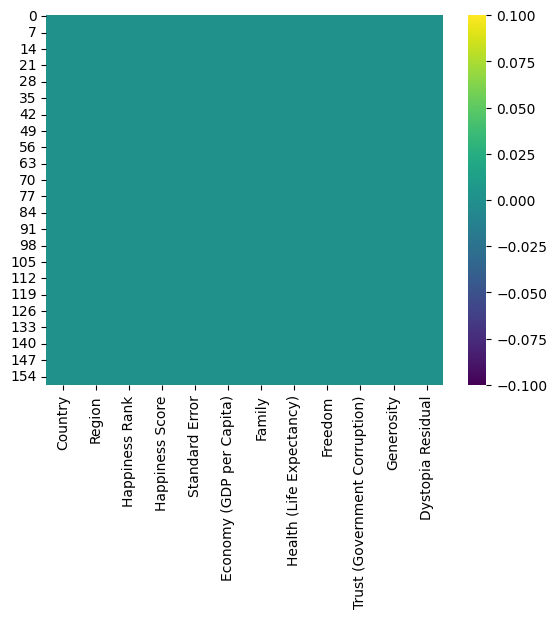

In [38]:
sns.heatmap(df.isnull(),cmap='viridis')